In [2]:
import numpy as np 
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import re
from sklearn.model_selection import train_test_split 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langdetect import detect

nltk.download('all')

DATASET_ENCODING = "ISO-8859-1" #To HANDLE DIFFERENT EMOJIS AND SYMBOLS 
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"] #THE DATA SET I FOUND ON KAGGLE HADNT BEEN INDEXED(structured) PROPERLY 
data=pd.read_csv("training.1600000.processed.noemoticon.csv", encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
train_data, test_data = train_test_split(data, test_size=0.30, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42)
# print(len(train_data))
# print(len(test_data))
# print(len(val_data))


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Arnav
[nltk_data]    |     Kaul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Arnav
[nltk_data]    |     Kaul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Arnav Kaul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Arnav Kaul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Arnav Kaul\AppDa

In [3]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langdetect import detect
import re

def preprocess_text(text):
    if not text:
        return ""  
    # Applying regex to remove URLs, hashtags, and mentions
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  
    text = re.sub(r"#\S+", "", text)  
    text = re.sub(r"@\S+", "", text)  

    # Replacing emoticons 
    emoticons = {":)": "positive", ":D": "positive", ":(": "negative", ":/": "negative"}
    for emoticon, sentiment in emoticons.items():
        text = text.replace(emoticon, sentiment)

    # Removing punctuation and digits
    text = re.sub(r"[^\w\s]", "", text) 
    text = re.sub(r"\d+", "", text)  

    # Tokenize and removing stopwords
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(filtered_tokens)

# Check if text is in English using langdetect
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False


train_data["cleaned_text"] = train_data["text"].apply(preprocess_text)
val_data["cleaned_text"] = val_data["text"].apply(preprocess_text)
test_data["cleaned_text"] = test_data["text"].apply(preprocess_text)


print(train_data.head(5))



         sentiment         ids                          date      flag  \
487661           0  2182218195  Mon Jun 15 12:52:48 PDT 2009  NO_QUERY   
476792           0  2177985387  Mon Jun 15 07:01:16 PDT 2009  NO_QUERY   
59496            0  1686162333  Sun May 03 04:05:23 PDT 2009  NO_QUERY   
910593           4  1751644678  Sat May 09 19:56:12 PDT 2009  NO_QUERY   
1312434          4  2013655370  Tue Jun 02 23:13:20 PDT 2009  NO_QUERY   

                    user                                               text  \
487661        LegalAdmin  Since I can't modify anything on Twitter til I...   
476792         _Anniken_  Going to the stable soon... last jumping lesso...   
59496           nitynola  @Giggles__Ox yeh they have been on, they showe...   
910593   blackwhiteworld  @goodlemax can you send me two coldplay songs?...   
1312434     enamoredsoul    @krist0ph3r does that satisfy as an answer!?!?    

                                              cleaned_text  
487661   since cant

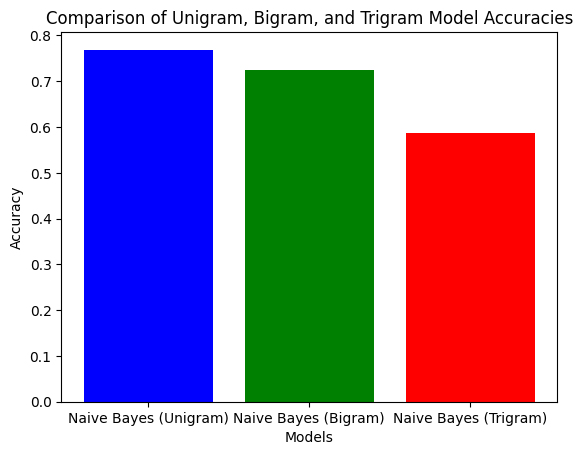

In [4]:
#Using Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

nb_unigram = MultinomialNB()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data["cleaned_text"])
vectorizer.get_feature_names_out() #unigram 

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(train_data["cleaned_text"]) #bigram
vectorizer2.get_feature_names_out()

X_train_unigram, X_val_unigram, y_train_unigram, y_val_unigram = train_test_split(
    X, train_data["sentiment"], test_size=0.2, random_state=42)

X_train_bigram, X_val_bigram, y_train_bigram, y_val_bigram = train_test_split(
    X2, train_data["sentiment"], test_size=0.2, random_state=42)

nb_unigram.fit(X_train_unigram, y_train_unigram)
y_pred_unigram = nb_unigram.predict(X_val_unigram)
accuracy_unigram = accuracy_score(y_val_unigram, y_pred_unigram)

nb_bigram = MultinomialNB()
nb_bigram.fit(X_train_bigram, y_train_bigram)
y_pred_bigram = nb_bigram.predict(X_val_bigram)
accuracy_bigram = accuracy_score(y_val_bigram, y_pred_bigram)

vectorizer3 = CountVectorizer(analyzer='word', ngram_range=(3, 3))
X3 = vectorizer3.fit_transform(train_data["cleaned_text"])
X_train_trigram, X_val_trigram, y_train_trigram, y_val_trigram = train_test_split(
    X3, train_data["sentiment"], test_size=0.2, random_state=42)


nb_trigram = MultinomialNB()
nb_trigram.fit(X_train_trigram, y_train_trigram)
y_pred_trigram = nb_trigram.predict(X_val_trigram)

accuracy_trigram = accuracy_score(y_val_trigram, y_pred_trigram)

models = ["Naive Bayes (Unigram)", "Naive Bayes (Bigram)", "Naive Bayes (Trigram)"]
scores = [accuracy_unigram, accuracy_bigram, accuracy_trigram]

plt.bar(models, scores, color=["blue", "green", "red"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Unigram, Bigram, and Trigram Model Accuracies")
plt.show()



In [1]:
#USING SVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ngram_ranges = [(1, 1), (2, 2), (3, 3)]
accuracies = []

for ngram_range in ngram_ranges:
    print(f"Evaluating for n-gram range: {ngram_range}")
    
    
    tfidf_vect = TfidfVectorizer(ngram_range=ngram_range)
    X_tfidf = tfidf_vect.fit_transform(train_data["cleaned_text"])
    
   
    X_train, X_val, y_train, y_val = train_test_split(
        X_tfidf, train_data["sentiment"], test_size=0.2, random_state=42
    )
    
    svm_model = SVC(kernel='linear', verbose=False,max_iter=1000)  
    svm_model.fit(X_train, y_train)
    
   
    y_pred = svm_model.predict(X_val)
    svm_accuracy = accuracy_score(y_val, y_pred,max_iter=1000)
    accuracies.append(svm_accuracy)
    
    
    print(f"SVM Model Accuracy ({ngram_range[0]}-gram to {ngram_range[1]}-gram):", svm_accuracy)
    
   
    conf_matrix = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for SVM Model ({ngram_range[0]}-gram to {ngram_range[1]}-gram)")
    plt.show()


plt.bar(["Unigram", "Bigram", "Trigram"], accuracies, color=["blue", "green", "red"])
plt.ylim(0, 1) 
plt.title("SVM Model Accuracy Comparison (Unigram, Bigram, Trigram)")
plt.ylabel("Accuracy")
plt.xlabel("N-gram Type")
plt.show()










Evaluating for n-gram range: (1, 1)


NameError: name 'train_data' is not defined

c:\Users\Arnav Kaul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Model Accuracy (1-gram to 1-gram):
  Train Accuracy: 0.5619327731092437
  Test Accuracy: 0.5649041666666667


c:\Users\Arnav Kaul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Model Accuracy (2-gram to 2-gram):
  Train Accuracy: 0.5016964285714286
  Test Accuracy: 0.5073291666666667


c:\Users\Arnav Kaul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Model Accuracy (3-gram to 3-gram):
  Train Accuracy: 0.49813025210084033
  Test Accuracy: 0.5026583333333333


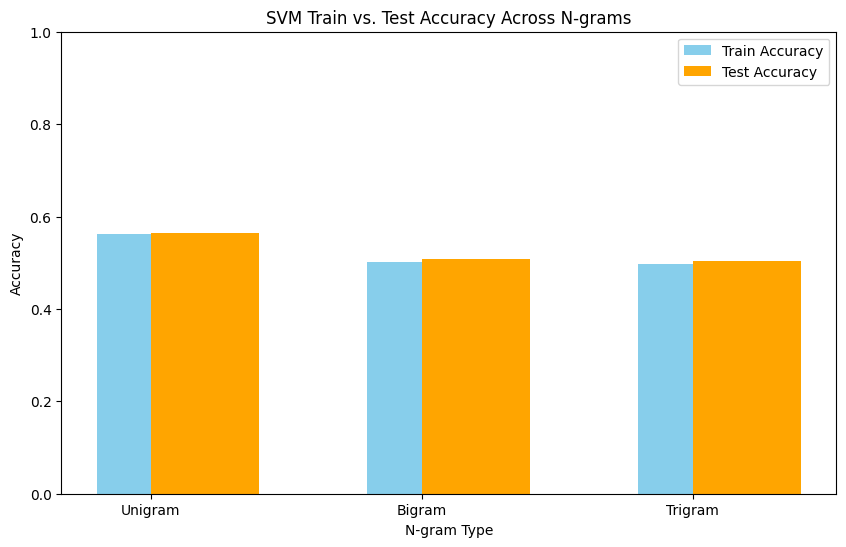

Execution Time: 294.7050874233246 seconds


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



ngram_ranges = [(1, 1), (2, 2), (3, 3)]
train_accuracies = []
test_accuracies = []

for ngram_range in ngram_ranges:
    
    tfidf_vect = TfidfVectorizer(ngram_range=ngram_range)
    X_tfidf = tfidf_vect.fit_transform(train_data["cleaned_text"])
    
   
    X_train, X_val, y_train, y_val = train_test_split(
        X_tfidf, train_data["sentiment"], test_size=0.2, random_state=42
    )
    
 
    svm_model = SVC(kernel='linear', verbose=False, max_iter=1000)
    svm_model.fit(X_train, y_train)
    
   
    y_val_pred = svm_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    train_accuracies.append(val_accuracy)
    

    X_test_tfidf = tfidf_vect.transform(test_data["cleaned_text"])
    y_test = test_data["sentiment"]
    y_test_pred = svm_model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    
  
    print(f"SVM Model Accuracy ({ngram_range[0]}-gram to {ngram_range[1]}-gram):")
    print(f"  Train Accuracy: {val_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")


labels = ["Unigram", "Bigram", "Trigram"]
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, width=0.4, label="Train Accuracy", align="center", color="skyblue")
plt.bar(x, test_accuracies, width=0.4, label="Test Accuracy", align="edge", color="orange")
plt.xticks(x, labels)
plt.ylim(0, 1)  
plt.title("SVM Train vs. Test Accuracy Across N-grams")
plt.xlabel("N-gram Type")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

